Rolling window with apply: https://stackoverflow.com/questions/42334544/how-to-apply-a-custom-function-with-a-window-parameter-in-a-pandas-dataframe


Rolling window apply function with multiple parameters: https://stackoverflow.com/questions/69006887/return-multiple-values-from-a-pandas-rolling-apply-function

Articles used:
* https://climate.colostate.edu/pdfs/relationshipofdroughtfrequency.pdf
* https://dl.acm.org/doi/abs/10.1145/3429309.3429320?casa_token=0Tnlb4yarioAAAAA:07z3btb2YPGDle1Sy4EZih9PQk6JUje9jhncKiBdqxXfW7NlZYWSgw3Rovm9Ozmki2QzH7o6sPVPSA
* https://iopscience.iop.org/article/10.1088/1748-9326/ab9cff/meta
* https://sci-hub.se/https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1752-1688.1999.tb03592.x?casa_token=vOimNOHz2vkAAAAA:oDNjvv7n8BZBBRU2TfmIF8Q_bl-D2liyVS9w_rFg47xkEcNJvl_aNXHvjAgI29GXNmKnPjjZzwsFyZS0

In [1]:
import pandas as pd
import numpy as np
import netCDF4 as nc
import xarray as xr
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
fp = '../data/precip.mon.total.2.5x2.5.v7.nc'
ds = nc.Dataset(fp)
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    history: Created 01/2016 based on V7 data obtained via ftp
    title: GPCC Precipitation Full V7 2.5x2.5 Monthly Total
    Conventions: CF 1.0
    References: http://www.psl.noaa.gov/data/gridded/data.gpcc.html
    Original_Source: http://www.dwd.de/en/FundE/Klima/KLIS/int/GPCC/GPCC.htm
 is the webpage and the data is at ftp://ftp.dwd.de/pub/data/gpcc/download.html
    Reference: Users of the data sets are kindly requested to give feed back and to refer to GPCC publications on this webpage: http://www.dwd.de/bvbw/appmanager/bvbw/dwdwwwDesktop/?_nfpb=true&_pageLabel=_dwdwww_klima_umwelt_datenzentren_wzn&T12404518261141645246564gsbDocumentPath=Content%2FOeffentlichkeit%2FKU%2FKU4%2FKU42%2Fteaser__product__access.html&_state=maximized&_windowLabel=T12404518261141645246564&lastPageLabel=_dwdwww_klima_umwelt_datenzentren_wzn
    original_source: ftp://ftp-anon.dwd.de/pub/data/gpcc/html/fulld

In [3]:
ds = xr.open_dataset(fp)
df = ds.to_dataframe()

In [4]:
df = df.reset_index()
df.head()

,lat,lon,time,precip
0,88.75,1.25,1901-01-01,NaN
1,88.75,1.25,1901-02-01,NaN
2,88.75,1.25,1901-03-01,NaN
3,88.75,1.25,1901-04-01,NaN
4,88.75,1.25,1901-05-01,NaN


In [5]:
central_amazon_data = df[(df['lat']<=1.25) & (df['lat']>=-11.25) & (df['lon']>=288.75) & (df['lon']<=306.25)]

In [6]:
central_amazon_data.isna().sum()

lat       0
lon       0
time      0
precip    0
dtype: int64

### Example for a given location on the grid

In [7]:
dt = central_amazon_data[(central_amazon_data['lat'] == 1.25) & (central_amazon_data['lon'] == 288.75)]

In [8]:
dt

,lat,lon,time,precip
6990180,1.25,288.75,1901-01-01,114.550003
6990181,1.25,288.75,1901-02-01,182.850006
6990182,1.25,288.75,1901-03-01,241.649994
6990183,1.25,288.75,1901-04-01,285.989990
6990184,1.25,288.75,1901-05-01,346.690002
...,...,...,...,...
6991531,1.25,288.75,2013-08-01,243.339996
6991532,1.25,288.75,2013-09-01,301.600006
6991533,1.25,288.75,2013-10-01,135.009995
6991534,1.25,288.75,2013-11-01,126.669998


In [9]:
dt['precip'].tail(24)

6991512    117.720001
6991513    206.179993
6991514    426.619995
6991515    431.869995
6991516    387.260010
6991517    311.950012
6991518    409.359985
6991519    259.910004
6991520    195.789993
6991521    247.860001
6991522      9.110000
6991523     88.269997
6991524     79.080002
6991525    194.160004
6991526    271.480011
6991527    403.049988
6991528    307.850006
6991529    373.109985
6991530    228.570007
6991531    243.339996
6991532    301.600006
6991533    135.009995
6991534    126.669998
6991535    166.910004
Name: precip, dtype: float32

In [10]:
dt['precip'].shift(periods=12).tail(24)

6991512    148.729996
6991513    155.009995
6991514    269.309998
6991515    393.119995
6991516    593.280029
6991517    335.239990
6991518    311.809998
6991519    135.869995
6991520    323.160004
6991521    175.960007
6991522    214.759995
6991523    214.960007
6991524    117.720001
6991525    206.179993
6991526    426.619995
6991527    431.869995
6991528    387.260010
6991529    311.950012
6991530    409.359985
6991531    259.910004
6991532    195.789993
6991533    247.860001
6991534      9.110000
6991535     88.269997
Name: precip, dtype: float32

In [11]:
dt['precip'].shift(periods=12).rolling(12, center=False).sum().tail(24)

6991512    3273.299988
6991513    3214.479980
6991514    3082.249969
6991515    3025.379974
6991516    3251.260010
6991517    3268.970001
6991518    3233.869995
6991519    3232.449997
6991520    3356.919998
6991521    3263.200012
6991522    3208.580002
6991523    3271.210007
6991524    3240.200012
6991525    3291.370010
6991526    3448.680008
6991527    3487.430008
6991528    3281.409988
6991529    3258.120010
6991530    3355.669998
6991531    3479.710007
6991532    3352.339996
6991533    3424.239990
6991534    3218.589995
6991535    3091.899985
Name: precip, dtype: float64

In [12]:
dt['cumulative_precip'] = dt['precip'].rolling(12, center=False).sum()

C:\Users\mathe\AppData\Local\Temp\ipykernel_22260\298788887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['cumulative_precip'] = dt['precip'].rolling(12, center=False).sum()


In [13]:
def gamma_params(x):
    if x.isna().sum() > 0:
        return [np.nan, np.nan, np.nan]
    else:
        fit_alpha, fit_loc, fit_beta = stats.gamma.fit(x)
        return [fit_alpha, fit_loc, fit_beta]

In [14]:
dt['gamma_params'] = [gamma_params(x) for x in dt['cumulative_precip'].shift(13).rolling(window=360, center=False)]

C:\Users\mathe\AppData\Local\Temp\ipykernel_22260\870450787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['gamma_params'] = [gamma_params(x) for x in dt['cumulative_precip'].shift(13).rolling(window=360, center=False)]


In [15]:
def spi_calculation(value, params):
    cdf_value = stats.gamma.cdf(value, *params)
    norm_spi = stats.norm.ppf(cdf_value, loc=0, scale=1)
    return norm_spi

In [16]:
dt['spi'] = dt.apply(lambda x: spi_calculation(x.cumulative_precip, x.gamma_params), axis=1)

C:\Users\mathe\AppData\Local\Temp\ipykernel_22260\3060969093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['spi'] = dt.apply(lambda x: spi_calculation(x.cumulative_precip, x.gamma_params), axis=1)


In [17]:
dt.tail(24)

,lat,lon,time,precip,cumulative_precip,gamma_params,spi
6991512,1.25,288.75,2012-01-01,117.720001,3240.200012,"[331.8428724220711, -1961.224454168586, 15.198...",0.583208
6991513,1.25,288.75,2012-02-01,206.179993,3291.370010,"[326.6818022237892, -1915.3573675999578, 15.30...",0.761166
6991514,1.25,288.75,2012-03-01,426.619995,3448.680008,"[290.8338437348997, -1651.3184928618066, 16.28...",1.296975
6991515,1.25,288.75,2012-04-01,431.869995,3487.430008,"[363.41002317256164, -2204.9703140622314, 14.5...",1.431524
6991516,1.25,288.75,2012-05-01,387.260010,3281.409988,"[321.3387404884911, -1902.401391698856, 15.522...",0.713773
6991517,1.25,288.75,2012-06-01,311.950012,3258.120010,"[376.79396156543316, -2306.4596285747866, 14.3...",0.623880
6991518,1.25,288.75,2012-07-01,409.359985,3355.669998,"[297.90314708113306, -1708.8801183813634, 16.0...",0.969159
6991519,1.25,288.75,2012-08-01,259.910004,3479.710007,"[376.5546564831059, -2307.726513873976, 14.321...",1.403593
6991520,1.25,288.75,2012-09-01,195.789993,3352.339996,"[308.6541526228699, -1802.410325101534, 15.845...",0.950679
6991521,1.25,288.75,2012-10-01,247.860001,3424.239990,"[282.3839522355758, -1596.0615212373355, 16.58...",1.202348


In [18]:
dt['spi'].dropna().reset_index(drop=True).describe()

count    973.000000
mean            NaN
std             NaN
min            -inf
25%       -0.496797
50%        0.180755
75%        1.010817
max             inf
Name: spi, dtype: float64

In [19]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [21]:
dt.reset_index(drop=True).tail(48)

,lat,lon,time,precip,cumulative_precip,gamma_params,spi
1308,1.25,288.75,2010-01-01,102.430000,3026.549980,"[391.1787490787576, -2456.3491685678446, 14.12...",-0.138544
1309,1.25,288.75,2010-02-01,213.830002,3057.449989,"[437.3621570428892, -2762.7603213608127, 13.33...",-0.026149
1310,1.25,288.75,2010-03-01,401.540009,3217.560005,"[422.7071357570053, -2663.1022268210727, 13.56...",0.545069
1311,1.25,288.75,2010-04-01,449.989990,3305.979988,"[487.57883986732884, -3104.7189118049864, 12.6...",0.852781
1312,1.25,288.75,2010-05-01,367.399994,3338.079994,"[453.7328346782989, -2850.7070426067085, 13.04...",0.975262
1313,1.25,288.75,2010-06-01,317.529999,3321.759987,"[455.63222460325983, -2905.384820079038, 13.11...",0.903073
1314,1.25,288.75,2010-07-01,346.910004,3284.400002,"[472.72878828594025, -2969.097677372798, 12.77...",0.782668
1315,1.25,288.75,2010-08-01,137.289993,3101.070000,"[417.33678938031176, -2618.9059561482572, 13.6...",0.131536
1316,1.25,288.75,2010-09-01,198.690002,3058.269997,"[381.50209602499876, -2363.600136198005, 14.24...",-0.026793
1317,1.25,288.75,2010-10-01,269.679993,3091.799995,"[406.4104778299313, -2559.0015155068522, 13.85...",0.090142


### Problems with the scipy nomerical estimation for the parameters

In [22]:
test = dt[0:414].reset_index(drop=True)
test.tail(24)

,lat,lon,time,precip,cumulative_precip,gamma_params,spi
390,1.25,288.75,1933-07-01,242.520004,3243.750046,"[779.7753123871876, -5353.88972566916, 10.9549...",0.192242
391,1.25,288.75,1933-08-01,232.110001,3073.910034,"[544.4409326079481, -3911.2848105202756, 13.03...",-0.360648
392,1.25,288.75,1933-09-01,246.559998,3036.010040,"[187.66520018615938, -956.692282012001, 22.077...",-0.479205
393,1.25,288.75,1933-10-01,222.779999,2937.900024,"[459.45261811830926, -3296.4312012698447, 14.1...",-0.826066
394,1.25,288.75,1933-11-01,229.729996,3005.690018,"[315.89892381883146, -2207.864322244144, 17.07...",-0.585812
395,1.25,288.75,1933-12-01,146.410004,2957.940018,"[445.55947952568954, -3291.30327797704, 14.540...",-0.740636
396,1.25,288.75,1934-01-01,79.889999,2940.160019,"[471.0487646586282, -3441.381939514311, 14.075...",-0.808605
397,1.25,288.75,1934-02-01,121.820000,2927.940025,"[653.6921982837989, -4554.823723617612, 11.846...",-0.859389
398,1.25,288.75,1934-03-01,172.889999,2777.340034,"[430.55997956346255, -3125.898180367685, 14.66...",-1.367173
399,1.25,288.75,1934-04-01,360.940002,2777.890022,"[293.8887623055215, -1987.1223760908733, 17.61...",-1.383697


493.4919802541963 -3591.28385198084 13.734518609189982


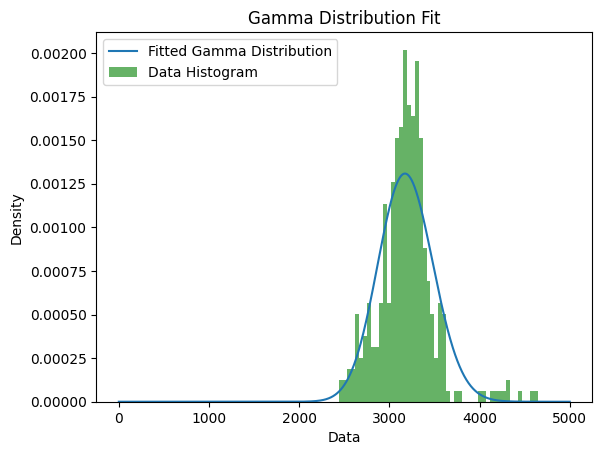

In [30]:
data1 = test[413-360:413]['cumulative_precip']

# Fit the gamma distribution to the data
shape, loc, scale = stats.gamma.fit(data1)
print(shape, loc, scale)

# Generate x values
x = np.linspace(0, 5000, 1000)

# Generate y values using the fitted parameters
y = stats.gamma.pdf(x, shape, loc, scale)

# Plot the density function
plt.plot(x, y, label='Fitted Gamma Distribution')
plt.hist(data1, bins=50, density=True, alpha=0.6, color='g', label='Data Histogram')

# Add labels and legend
plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Gamma Distribution Fit')
plt.legend()

# Show the plot
plt.show()

0.027704402687363835 2443.1999816894527 2.564247804165448


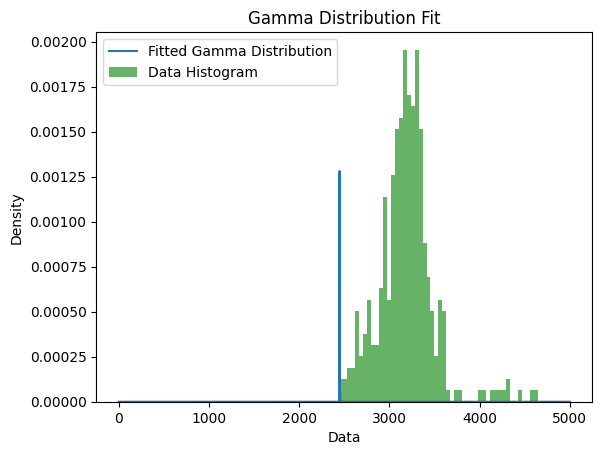

In [31]:
data2 = test[412-360:412]['cumulative_precip']

# Fit the gamma distribution to the data
shape, loc, scale = stats.gamma.fit(data2)
print(shape, loc, scale)

# Generate x values
x = np.linspace(0, 5000, 1000)

# Generate y values using the fitted parameters
y = stats.gamma.pdf(x, shape, loc, scale)

# Plot the density function
plt.plot(x, y, label='Fitted Gamma Distribution')
plt.hist(data2, bins=50, density=True, alpha=0.6, color='g', label='Data Histogram')

# Add labels and legend
plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Gamma Distribution Fit')
plt.legend()

# Show the plot
plt.show()

### Testing the Gamma fit using initial guesses from statistical estimators

Initial estimates - Shape: 103.88933330930783, Loc: 0, Scale: 30.683190955224614
Fitted parameters - Shape: 71.40882418846724, Loc: 616.9574165409122, Scale: 35.95890196726586


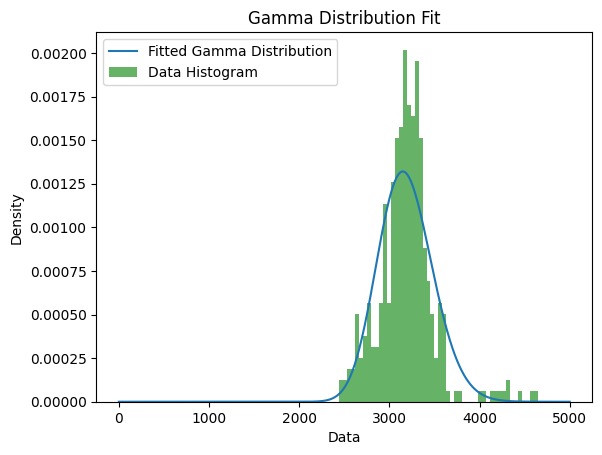

In [32]:
# data = test[413-360:413]['cumulative_precip']
data = test[412-360:412]['cumulative_precip']

# Calculate sample mean and variance
mean = np.mean(data)
variance = np.var(data)

# Calculate initial estimates for the gamma parameters
initial_scale = variance / mean
initial_shape = mean**2 / variance
initial_loc = 0  # assuming data is not shifted

print(f"Initial estimates - Shape: {initial_shape}, Loc: {initial_loc}, Scale: {initial_scale}")

# Fit the gamma distribution to the data using initial estimates
params = stats.gamma.fit(data, loc=initial_loc, scale=initial_scale)
shape, loc, scale = params

print(f"Fitted parameters - Shape: {shape}, Loc: {loc}, Scale: {scale}")

# Generate x values
x = np.linspace(0, 5000, 1000)

# Generate y values using the fitted parameters
y = stats.gamma.pdf(x, shape, loc, scale)

# Plot the density function
plt.plot(x, y, label='Fitted Gamma Distribution')
plt.hist(data1, bins=50, density=True, alpha=0.6, color='g', label='Data Histogram')

# Add labels and legend
plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Gamma Distribution Fit')
plt.legend()

# Show the plot
plt.show()

### First treatment function implementation

In [33]:
def standardization(value, params):
    cdf_value = stats.gamma.cdf(value, *params)
    norm_spi = stats.norm.ppf(cdf_value, loc=0, scale=1)
    return norm_spi

def gamma_params(x, initial_est=True):
    if x.isna().sum() > 0:
        return [np.nan, np.nan, np.nan]
    elif initial_est:
        # Calculate sample mean and variance
        mean = np.mean(x)
        variance = np.var(x)

        # Calculate initial estimates for the gamma parameters
        initial_scale = variance/mean
        initial_loc = 0  # assuming data is not shifted

        # Fit the gamma distribution to the data using initial estimates
        shape, loc, scale = stats.gamma.fit(x, loc=initial_loc, scale=initial_scale)
        return [shape, loc, scale]
    else:
        shape, loc, scale = stats.gamma.fit(x)
        return [shape, loc, scale]

def spi_table(initial_precip_table, fit_period=12, initial_est=True):

    precip_table = initial_precip_table.copy()
    precip_table.loc[:,'cumulative_precip'] = np.nan
    precip_table.loc[:,'SPI'] = np.nan

    iters = len(precip_table['lat'].unique())*len(precip_table['lon'].unique())
    print('Total iterations:', iters, '\n\n')
    counter = 0

    for lat in precip_table['lat'].unique():
        for lon in precip_table['lon'].unique():

            aux_df = pd.DataFrame()
            series = precip_table[(precip_table['lat']==lat) & (precip_table['lon']==lon)]['precip']

            # 12 months (1 year) cumulative precipitation
            aux_df['cumulative_precip'] = series.rolling(fit_period, center=False).sum()

            # Fit gamma distribution for 12 months cumulative precipitation considering 360 months offset from t-12 backwards
            aux_df['gamma_params'] = [gamma_params(x, initial_est) for x in aux_df['cumulative_precip'].shift(13).rolling(window=360, center=False)]

            # Obtain spi using the gamma parameters fitted and the current 12 month precipitation value
            spi_value = aux_df.apply(lambda x: standardization(x.cumulative_precip, x.gamma_params), axis=1)

            # Sets the obtained SPI values on the final table
            precip_table.loc[(precip_table['lat']==lat) & (precip_table['lon']==lon), 'cumulative_precip'] = aux_df['cumulative_precip']
            precip_table.loc[(precip_table['lat']==lat) & (precip_table['lon']==lon), 'SPI'] = spi_value

            del aux_df

            counter+=1
            print('Completeness', round(counter/iters, 4))
            
    return precip_table

In [35]:
test = central_amazon_data[(central_amazon_data['lat'] == 1.25) & (central_amazon_data['lon'] == 288.75)|
                           (central_amazon_data['lat'] == -11.25) & (central_amazon_data['lon'] == 288.75)]

In [36]:
test_res = spi_table(test)

Total iterations: 2 


Completeness 0.5
Completeness 1.0


In [37]:
test_res

,lat,lon,time,precip,cumulative_precip,SPI
6990180,1.25,288.75,1901-01-01,114.550003,NaN,NaN
6990181,1.25,288.75,1901-02-01,182.850006,NaN,NaN
6990182,1.25,288.75,1901-03-01,241.649994,NaN,NaN
6990183,1.25,288.75,1901-04-01,285.989990,NaN,NaN
6990184,1.25,288.75,1901-05-01,346.690002,NaN,NaN
6990185,1.25,288.75,1901-06-01,292.799988,NaN,NaN
6990186,1.25,288.75,1901-07-01,371.540009,NaN,NaN
6990187,1.25,288.75,1901-08-01,327.369995,NaN,NaN
6990188,1.25,288.75,1901-09-01,226.960007,NaN,NaN
6990189,1.25,288.75,1901-10-01,300.059998,NaN,NaN


In [38]:
central_amazon_spi = spi_table(central_amazon_data)

Total iterations: 48 


Completeness 0.0208
Completeness 0.0417
Completeness 0.0625
Completeness 0.0833
Completeness 0.1042
Completeness 0.125
Completeness 0.1458
Completeness 0.1667
Completeness 0.1875
Completeness 0.2083
Completeness 0.2292
Completeness 0.25
Completeness 0.2708
Completeness 0.2917
Completeness 0.3125
Completeness 0.3333
Completeness 0.3542
Completeness 0.375
Completeness 0.3958
Completeness 0.4167
Completeness 0.4375
Completeness 0.4583
Completeness 0.4792
Completeness 0.5
Completeness 0.5208
Completeness 0.5417
Completeness 0.5625
Completeness 0.5833
Completeness 0.6042
Completeness 0.625
Completeness 0.6458
Completeness 0.6667
Completeness 0.6875
Completeness 0.7083
Completeness 0.7292
Completeness 0.75
Completeness 0.7708
Completeness 0.7917
Completeness 0.8125
Completeness 0.8333
Completeness 0.8542
Completeness 0.875
Completeness 0.8958
Completeness 0.9167
Completeness 0.9375
Completeness 0.9583
Completeness 0.9792
Completeness 1.0


In [39]:
central_amazon_spi.to_csv('data/central_amazon_spi.csv', index=False)

In [41]:
drought_series = central_amazon_spi[['lat', 'lon', 'time', 'SPI']].copy()
drought_series.fillna(0, inplace=True)

In [46]:
k = -1
drought_series['drought'] = drought_series['SPI'].apply(lambda x: 1 if x <= k else 0)

In [47]:
drought_series.shape

(65088, 5)

<Axes: xlabel='time'>

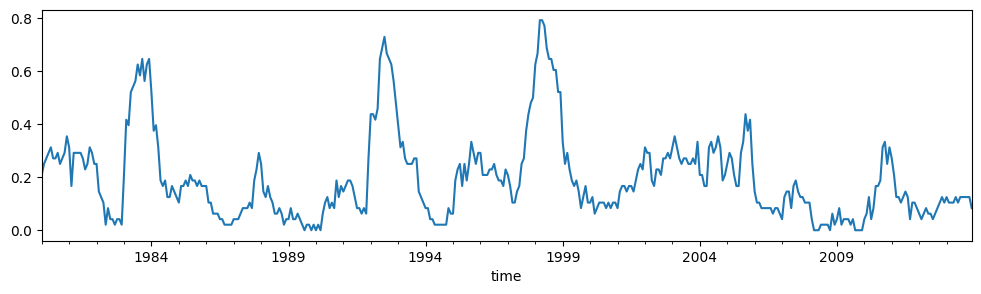

In [48]:
drought_series[['time', 'drought']][drought_series['time'] >= '1980-01-01'].groupby('time').apply(np.mean).plot(figsize=(12,3))